In [2]:
#Import Libraries

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8) #Adjust the config of the plots we will create

In [3]:
#Read and look Data

df= pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Let's see if there is ant missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {:.1f}%'.format(col, pct_missing))

In [12]:
#Data type for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [34]:
#Sorting the table by gross
#ordenando la tabla por Ingreso Bruto

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,"18,"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,", 201"
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,"19,"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,"18,"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,", 201"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,"23, 2"
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,"7, 2"
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,", 202"
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,"1, 20"


In [35]:
pd.set_option('display.max_rows', None)

In [4]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [5]:
# Drop any duplicate
#Eliminar Duplicados

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

In [39]:
# Budget high correlation
# company high correlation

# Correlacion de presupuestos
# Correlacion de las empresas


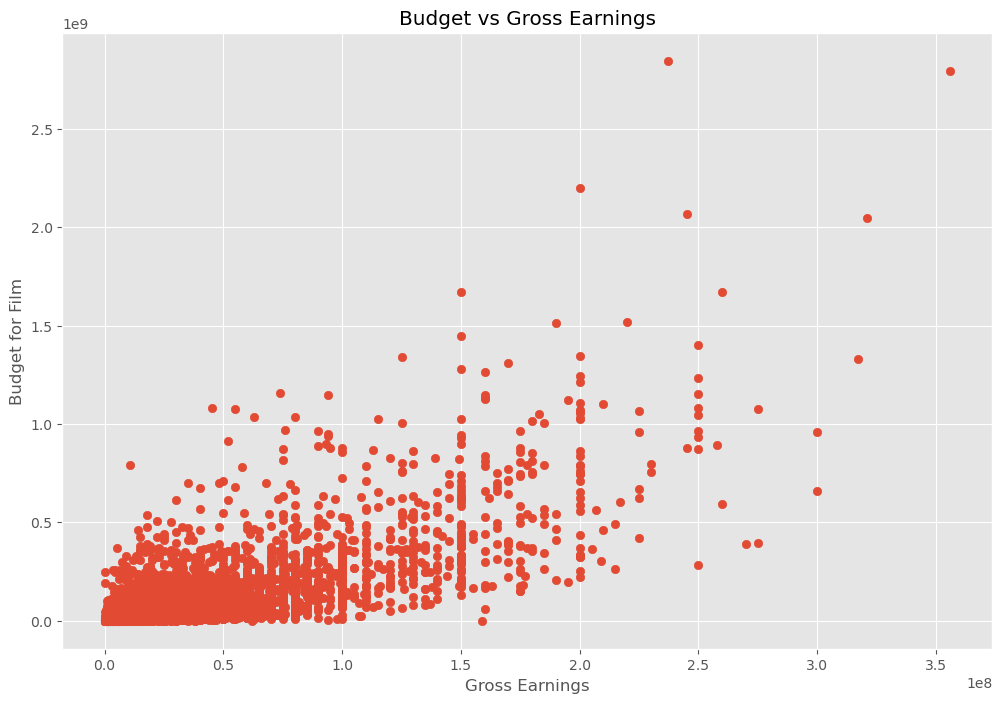

In [41]:
#scatter plot with budget vs gross
#Diagrama de dispersión con presupuesto vs bruta

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')


plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

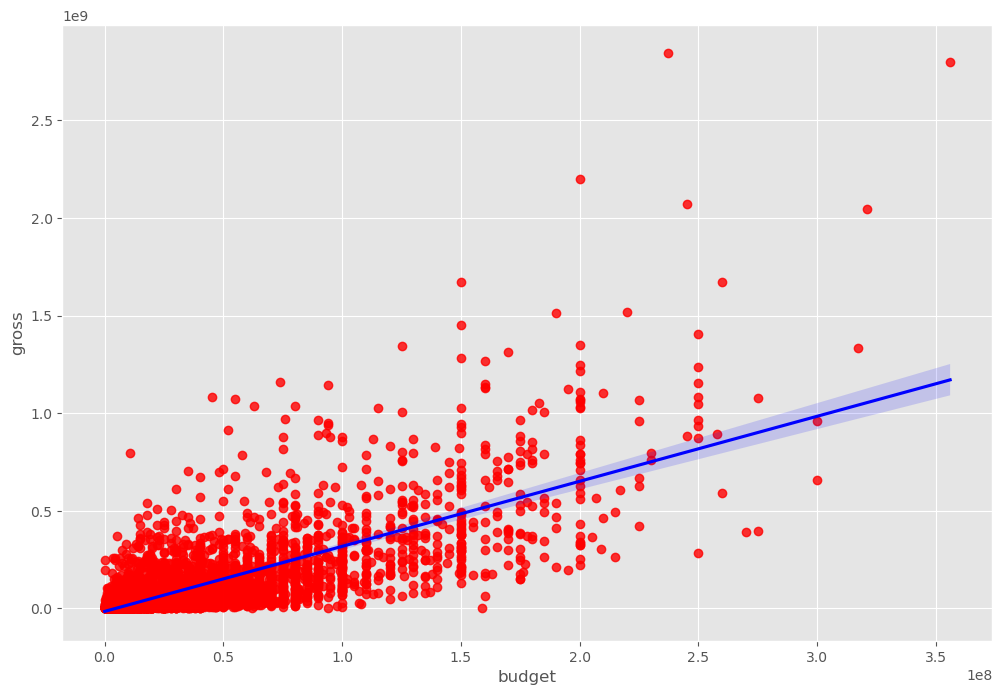

In [6]:
#Plot budget vs gross usin seaborn
#Grafico de Presupuesto vs Ingresos Brutos usando seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [9]:
#let's start lokking at correlation
# Correlation Matrix between all numeric columns
#Comencemos a mirar la correlación


df.corr( method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [19]:
df.corr( method='kendall')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.009373,0.011615,0.007957,-0.007514,0.007769,0.005842,0.005961,0.006196,0.004366,-0.005985,0.014819,-0.000495,0.006715,0.010191
rating,-0.009373,1.000000,0.100890,-0.000516,0.023896,0.019863,0.017004,0.007735,0.001079,0.013431,0.022408,-0.198859,-0.134830,-0.061833,0.055823
genre,0.011615,0.100890,1.000000,-0.059866,0.021527,0.049721,-0.149969,-0.012338,0.002779,-0.003664,-0.056763,-0.278966,-0.210893,-0.065025,-0.015251
year,0.007957,-0.000516,-0.059866,1.000000,0.000399,0.067652,0.331465,-0.013311,-0.005800,-0.018181,-0.068822,0.224120,0.200618,-0.002283,0.097184
released,-0.007514,0.023896,0.021527,0.000399,1.000000,0.027612,-0.008681,-0.000762,-0.001510,0.010395,-0.020635,-0.003801,-0.028470,-0.004634,0.004405
score,0.007769,0.019863,0.049721,0.067652,0.027612,1.000000,0.300115,0.010082,0.013060,0.000163,-0.172293,-0.000566,0.086046,-0.004454,0.283611
votes,0.005842,0.017004,-0.149969,0.331465,-0.008681,0.300115,1.000000,0.012942,0.009177,-0.009153,0.056417,0.353702,0.548899,0.125344,0.198240
director,0.005961,0.007735,-0.012338,-0.013311,-0.000762,0.010082,0.012942,1.000000,0.227312,0.026451,0.009532,-0.006020,0.010520,0.002917,0.010240
writer,0.006196,0.001079,0.002779,-0.005800,-0.001510,0.013060,0.009177,0.227312,1.000000,0.018635,0.008789,-0.015664,0.000855,0.003640,-0.008642
star,0.004366,0.013431,-0.003664,-0.018181,0.010395,0.000163,-0.009153,0.026451,0.018635,1.000000,-0.016154,-0.009778,-0.008320,0.006753,0.005899


In [20]:
df.corr( method='spearman')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.012197,0.015940,0.011978,-0.011298,0.011505,0.008739,0.008912,0.009201,0.006639,-0.007715,0.022180,-0.000634,0.010211,0.015295
rating,-0.012197,1.000000,0.123670,-0.000120,0.031884,0.024234,0.022363,0.010232,0.001379,0.017564,0.025221,-0.254885,-0.173251,-0.079008,0.072508
genre,0.015940,0.123670,1.000000,-0.081261,0.029685,0.067659,-0.204214,-0.016710,0.003902,-0.004860,-0.067968,-0.376346,-0.288896,-0.089637,-0.023203
year,0.011978,-0.000120,-0.081261,1.000000,-0.000334,0.099045,0.469829,-0.019843,-0.008666,-0.026876,-0.088509,0.317336,0.293084,-0.004300,0.142977
released,-0.011298,0.031884,0.029685,-0.000334,1.000000,0.041079,-0.014314,-0.001206,-0.002330,0.015694,-0.026772,-0.006394,-0.045193,-0.007243,0.006738
score,0.011505,0.024234,0.067659,0.099045,0.041079,1.000000,0.428138,0.014691,0.019175,0.000372,-0.218330,-0.001403,0.126116,-0.006822,0.399857
votes,0.008739,0.022363,-0.204214,0.469829,-0.014314,0.428138,1.000000,0.019429,0.013890,-0.013697,0.073396,0.502466,0.742050,0.185955,0.290159
director,0.008912,0.010232,-0.016710,-0.019843,-0.001206,0.014691,0.019429,1.000000,0.299032,0.039391,0.012424,-0.008635,0.015700,0.004255,0.015192
writer,0.009201,0.001379,0.003902,-0.008666,-0.002330,0.019175,0.013890,0.299032,1.000000,0.027368,0.011371,-0.023175,0.001202,0.005256,-0.012915
star,0.006639,0.017564,-0.004860,-0.026876,0.015694,0.000372,-0.013697,0.039391,0.027368,1.000000,-0.020899,-0.014599,-0.012207,0.010087,0.008661


Text(120.72222222222221, 0.5, 'Movie Feature')

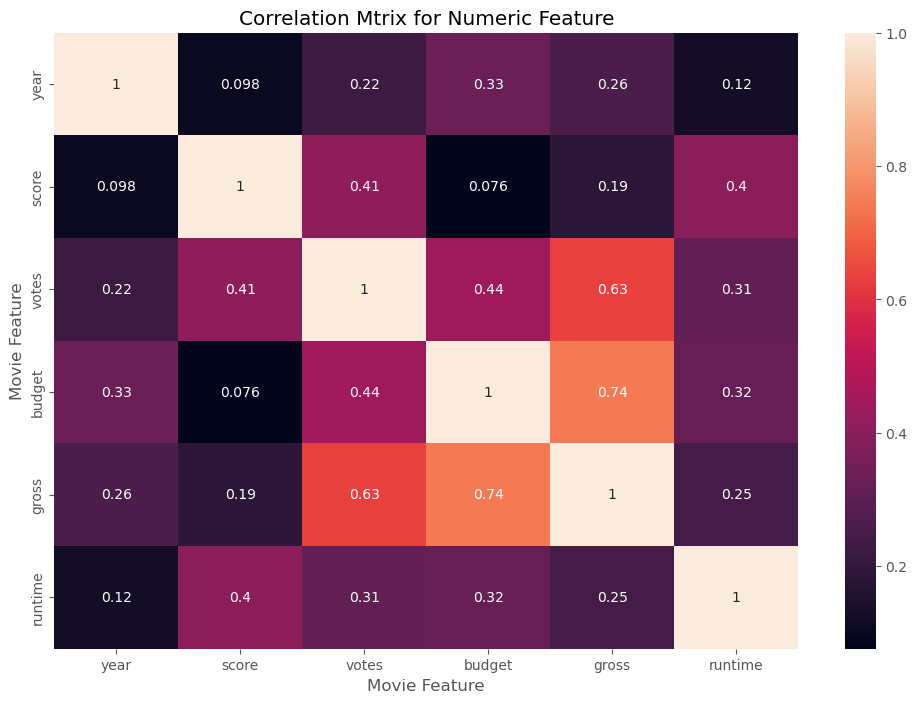

In [11]:
# Hihgh correaltione between budget and gross

# Alta correlación entre presupuesto e ingreso bruto

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Mtrix for Numeric Feature')

plt.xlabel('Movie Feature')

plt.ylabel('Movie Feature')


In [12]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


Text(120.72222222222221, 0.5, 'Movie Feature')

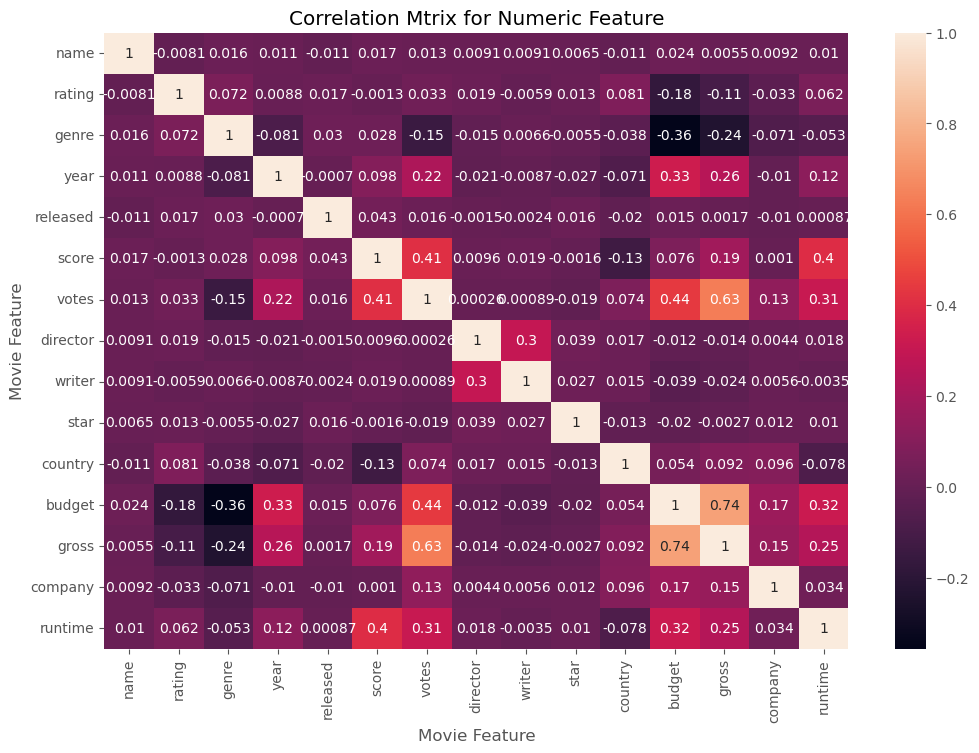

In [13]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Mtrix for Numeric Feature')

plt.xlabel('Movie Feature')

plt.ylabel('Movie Feature')

In [15]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [17]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.356564
genre    budget    -0.356564
         gross     -0.235650
gross    genre     -0.235650
rating   budget    -0.176002
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [18]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [6]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [7]:
df.groupby(['company', 'year'])[["gross"]].sum()


,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926.0
"""Weathering With You"" Film Partners",2019,193457467.0
.406 Production,1996,10580.0
1+2 Seisaku Iinkai,2000,1196218.0
10 West Studios,2010,814906.0
...,...,...
i am OTHER,2015,17986781.0
i5 Films,2001,10031529.0
iDeal Partners Film Fund,2013,506303.0


In [8]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64